Name: Afdal Bouraima
student number : 2304491

# **Import libraries**

In [ ]:
import tensorflow as tf
#print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


In [ ]:
from tensorflow import keras
from keras.datasets import mnist,cifar10
from keras import Sequential,callbacks
from keras.layers import Input,Conv2D,Dense,MaxPooling2D,Dropout,Flatten
from matplotlib import pyplot as plt

# **Neural network**

In [ ]:
def NeuralNetwork(activation,input_shape):
  #Construct our model
  model = Sequential()
  model.add(Input(shape=input_shape))
  model.add(Conv2D(32,(3,3),activation=activation,padding="same"))
  model.add(Conv2D(64,(3,3),activation=activation,padding="same"))
  model.add(MaxPooling2D((3,3)))
  model.add(Dropout(.5))
  model.add(Flatten())
  model.add(Dense(250,activation=activation))
  model.add(Dense(10,activation="softmax"))
  #We compile it
  model.compile(optimizer = keras.optimizers.Adam(),
                loss=keras.losses.categorical_crossentropy,
                metrics=['accuracy'])
  # And we return it
  return model


# **MNIST DATASET**

11490434/11490434 [==============================] - 0s 0us/step


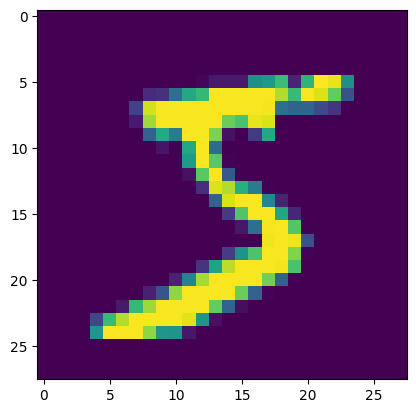

In [ ]:
#Load the MNIST dataset
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()
plt.imshow(train_images[0])

In [ ]:
#We normalize the input
train_images=train_images/255
test_images=test_images/255

#We reshape it to have 60000X28X28X1
train_images = tf.reshape(train_images,(train_images.shape[0],28,28,1))
#We reshape it to have 10000X28X28X1
test_images = tf.reshape(test_images,(test_images.shape[0],28,28,1))

#Transform the labels to categorial values
train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)

# validation data
x_validation = train_images[-2000:,:,:,:]
y_validation = train_labels[-2000:]

train_images = train_images[:-2000,:,:,:]
train_labels = train_labels[:-2000]

In [ ]:
nodes = ["sigmoid","tanh","relu","elu","selu"]
def plot_results(history, activation_function, dataset):
    plt.figure(figsize=(12, 4))

    # Plot training and validation loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{activation_function} Activation Function - {dataset}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{activation_function} Activation Function - {dataset}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()


Epoch 1/45
454/454 [==============================] - 17s 11ms/step - loss: 1.4251 - accuracy: 0.4913 - val_loss: 0.1979 - val_accuracy: 0.9480
Epoch 2/45
454/454 [==============================] - 5s 11ms/step - loss: 0.2557 - accuracy: 0.9235 - val_loss: 0.1128 - val_accuracy: 0.9705
Epoch 3/45
454/454 [==============================] - 5s 11ms/step - loss: 0.1608 - accuracy: 0.9516 - val_loss: 0.0745 - val_accuracy: 0.9815
Epoch 4/45
454/454 [==============================] - 5s 11ms/step - loss: 0.1067 - accuracy: 0.9686 - val_loss: 0.0579 - val_accuracy: 0.9895
Epoch 5/45
454/454 [==============================] - 5s 11ms/step - loss: 0.0784 - accuracy: 0.9763 - val_loss: 0.0467 - val_accuracy: 0.9915
Epoch 6/45
454/454 [==============================] - 5s 11ms/step - loss: 0.0615 - accuracy: 0.9818 - val_loss: 0.0416 - val_accuracy: 0.9925
Epoch 7/45
454/454 [==============================] - 5s 12ms/step - loss: 0.0508 - accuracy: 0.9847 - val_loss: 0.0370 - val_accuracy: 0.992

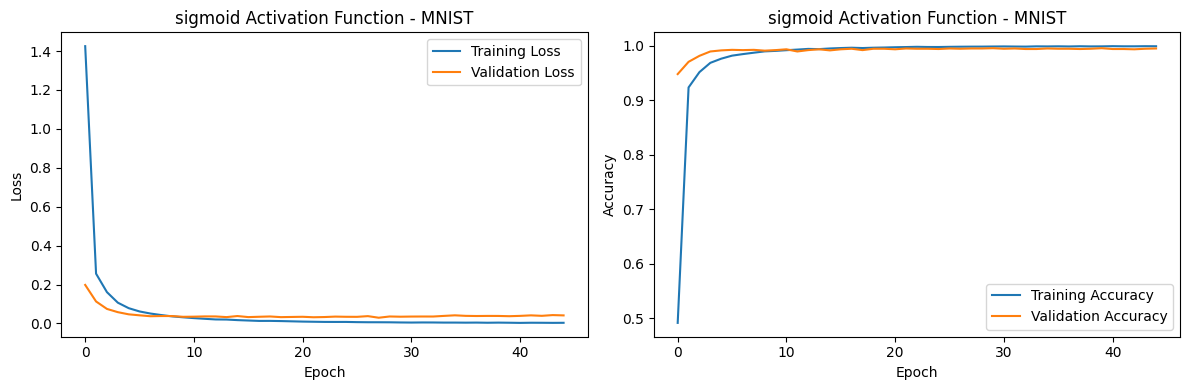

Epoch 1/45
454/454 [==============================] - 7s 11ms/step - loss: 0.1714 - accuracy: 0.9483 - val_loss: 0.0517 - val_accuracy: 0.9880
Epoch 2/45
454/454 [==============================] - 5s 11ms/step - loss: 0.0652 - accuracy: 0.9799 - val_loss: 0.0497 - val_accuracy: 0.9890
Epoch 3/45
454/454 [==============================] - 5s 11ms/step - loss: 0.0471 - accuracy: 0.9853 - val_loss: 0.0374 - val_accuracy: 0.9920
Epoch 4/45
454/454 [==============================] - 5s 11ms/step - loss: 0.0339 - accuracy: 0.9893 - val_loss: 0.0297 - val_accuracy: 0.9940
Epoch 5/45
454/454 [==============================] - 5s 11ms/step - loss: 0.0284 - accuracy: 0.9909 - val_loss: 0.0394 - val_accuracy: 0.9910
Epoch 6/45
454/454 [==============================] - 5s 11ms/step - loss: 0.0244 - accuracy: 0.9917 - val_loss: 0.0412 - val_accuracy: 0.9900
Epoch 7/45
454/454 [==============================] - 5s 11ms/step - loss: 0.0202 - accuracy: 0.9937 - val_loss: 0.0347 - val_accuracy: 0.9930

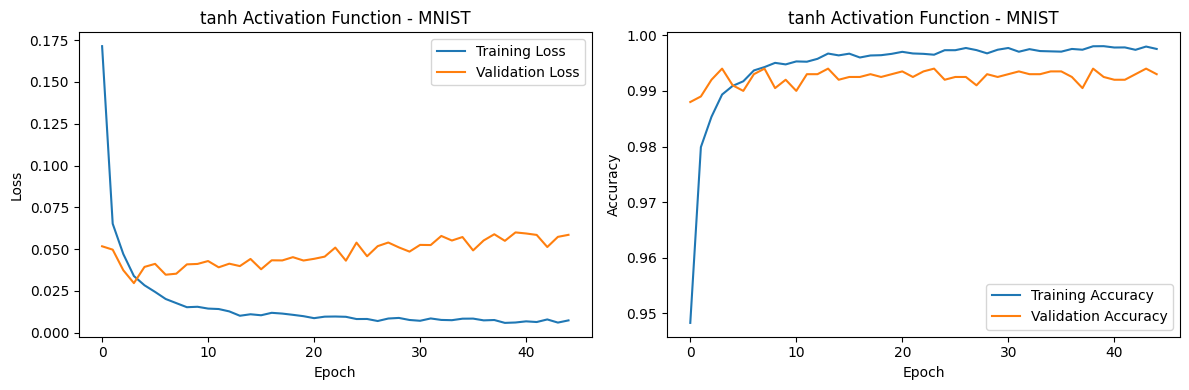

Epoch 1/45
454/454 [==============================] - 6s 11ms/step - loss: 0.1877 - accuracy: 0.9424 - val_loss: 0.0485 - val_accuracy: 0.9905
Epoch 2/45
454/454 [==============================] - 5s 10ms/step - loss: 0.0617 - accuracy: 0.9810 - val_loss: 0.0377 - val_accuracy: 0.9930
Epoch 3/45
454/454 [==============================] - 5s 10ms/step - loss: 0.0442 - accuracy: 0.9853 - val_loss: 0.0326 - val_accuracy: 0.9930
Epoch 4/45
454/454 [==============================] - 5s 11ms/step - loss: 0.0354 - accuracy: 0.9883 - val_loss: 0.0345 - val_accuracy: 0.9935
Epoch 5/45
454/454 [==============================] - 5s 10ms/step - loss: 0.0277 - accuracy: 0.9912 - val_loss: 0.0428 - val_accuracy: 0.9925
Epoch 6/45
454/454 [==============================] - 5s 10ms/step - loss: 0.0252 - accuracy: 0.9914 - val_loss: 0.0304 - val_accuracy: 0.9955
Epoch 7/45
454/454 [==============================] - 5s 11ms/step - loss: 0.0209 - accuracy: 0.9929 - val_loss: 0.0365 - val_accuracy: 0.9940

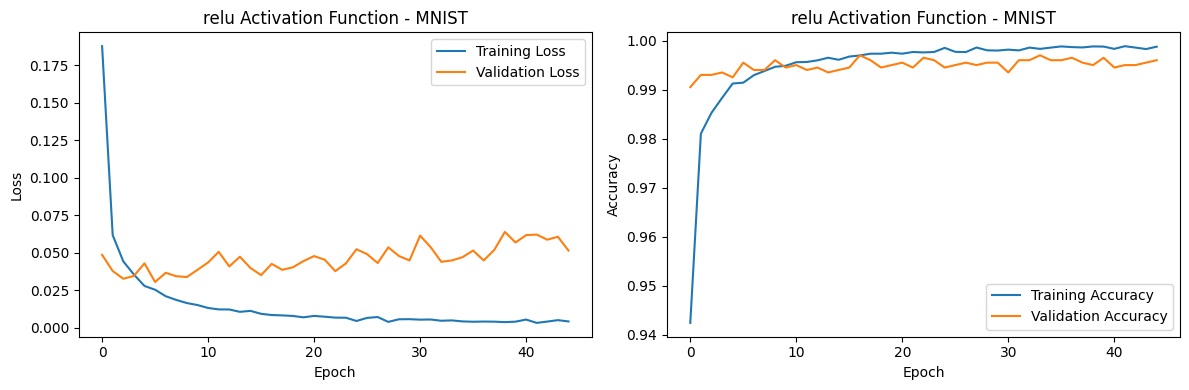

Epoch 1/45
454/454 [==============================] - 7s 12ms/step - loss: 0.1809 - accuracy: 0.9442 - val_loss: 0.0497 - val_accuracy: 0.9895
Epoch 2/45
454/454 [==============================] - 5s 11ms/step - loss: 0.0728 - accuracy: 0.9772 - val_loss: 0.0493 - val_accuracy: 0.9910
Epoch 3/45
454/454 [==============================] - 5s 11ms/step - loss: 0.0516 - accuracy: 0.9836 - val_loss: 0.0439 - val_accuracy: 0.9905
Epoch 4/45
454/454 [==============================] - 5s 12ms/step - loss: 0.0378 - accuracy: 0.9879 - val_loss: 0.0510 - val_accuracy: 0.9905
Epoch 5/45
454/454 [==============================] - 5s 11ms/step - loss: 0.0297 - accuracy: 0.9904 - val_loss: 0.0510 - val_accuracy: 0.9910
Epoch 6/45
454/454 [==============================] - 5s 11ms/step - loss: 0.0251 - accuracy: 0.9916 - val_loss: 0.0443 - val_accuracy: 0.9940
Epoch 7/45
454/454 [==============================] - 5s 11ms/step - loss: 0.0221 - accuracy: 0.9929 - val_loss: 0.0549 - val_accuracy: 0.9915

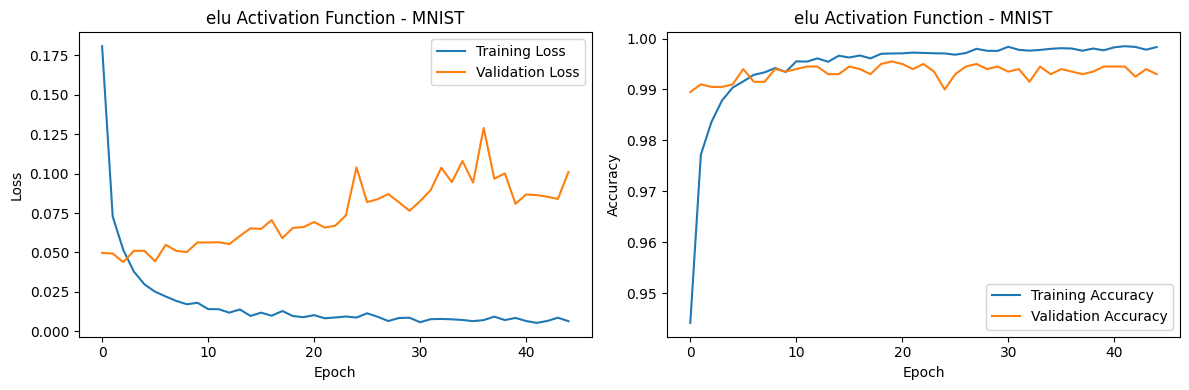

Epoch 1/45
454/454 [==============================] - 6s 12ms/step - loss: 0.1816 - accuracy: 0.9441 - val_loss: 0.0660 - val_accuracy: 0.9860
Epoch 2/45
454/454 [==============================] - 5s 12ms/step - loss: 0.0900 - accuracy: 0.9724 - val_loss: 0.0612 - val_accuracy: 0.9845
Epoch 3/45
454/454 [==============================] - 5s 11ms/step - loss: 0.0645 - accuracy: 0.9794 - val_loss: 0.0571 - val_accuracy: 0.9875
Epoch 4/45
454/454 [==============================] - 5s 11ms/step - loss: 0.0493 - accuracy: 0.9839 - val_loss: 0.0506 - val_accuracy: 0.9905
Epoch 5/45
454/454 [==============================] - 5s 12ms/step - loss: 0.0377 - accuracy: 0.9874 - val_loss: 0.0466 - val_accuracy: 0.9930
Epoch 6/45
454/454 [==============================] - 5s 11ms/step - loss: 0.0306 - accuracy: 0.9894 - val_loss: 0.0466 - val_accuracy: 0.9935
Epoch 7/45
454/454 [==============================] - 5s 11ms/step - loss: 0.0273 - accuracy: 0.9907 - val_loss: 0.0465 - val_accuracy: 0.9930

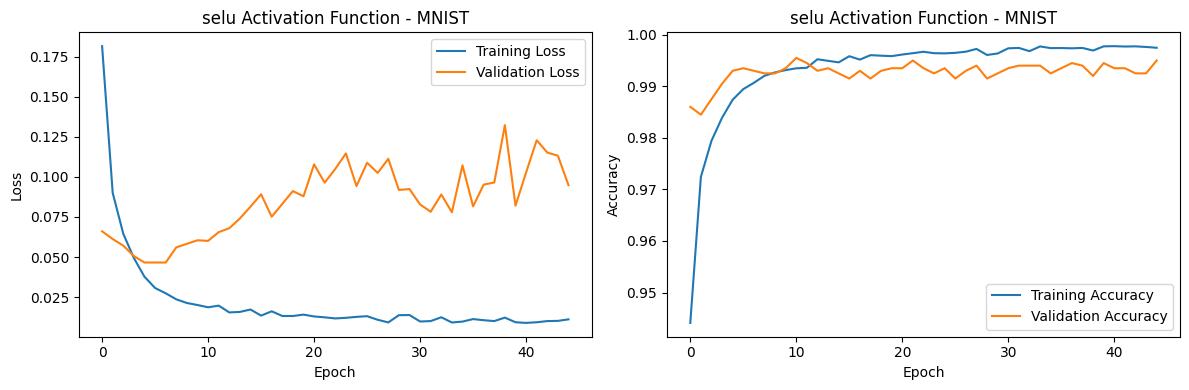

In [ ]:
for node in nodes:
  model=NeuralNetwork(node,input_shape=(28,28,1))
  history=model.fit(train_images,train_labels,batch_size=128,validation_data=(x_validation,y_validation),epochs=45)
  plot_results(history,node,"MNIST")

COMMENTS: By looking at the different curves, we notice at some point there is overfitting. for my analyse I look at the difference between trainning and validation accuracies, smaller it is, better is our activation function. this leads me to take **Sigmoid** as the best activation node for the MNIST dataset based on my experiment.

# **CIFAR10 DATASET**

In [ ]:
(train_images,train_labels),(test_images,test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


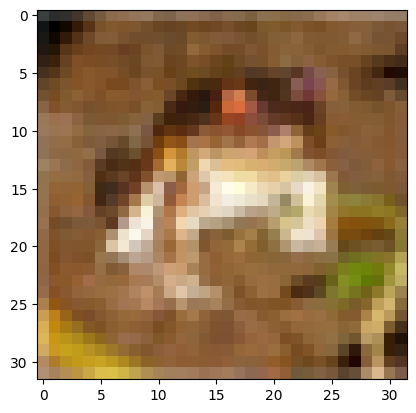

In [ ]:
plt.imshow(train_images[0])

In [ ]:
#We normalize the input
train_images = train_images/255
test_images = test_images/255

#Transform the labels to categorial values
train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)

#validation data
x_validation = train_images[-2000:,:,:,:]
y_validation = train_labels[-2000:]

train_images = train_images[:-2000,:,:,:]
train_labels = train_labels[:-2000]

Epoch 1/45
375/375 [==============================] - 7s 14ms/step - loss: 2.3229 - accuracy: 0.1090 - val_loss: 2.1623 - val_accuracy: 0.2175
Epoch 2/45
375/375 [==============================] - 5s 12ms/step - loss: 1.9183 - accuracy: 0.3107 - val_loss: 1.8026 - val_accuracy: 0.3510
Epoch 3/45
375/375 [==============================] - 5s 12ms/step - loss: 1.7053 - accuracy: 0.3876 - val_loss: 1.6185 - val_accuracy: 0.4195
Epoch 4/45
375/375 [==============================] - 5s 13ms/step - loss: 1.5796 - accuracy: 0.4343 - val_loss: 1.4951 - val_accuracy: 0.4765
Epoch 5/45
375/375 [==============================] - 5s 12ms/step - loss: 1.5075 - accuracy: 0.4602 - val_loss: 1.4274 - val_accuracy: 0.5005
Epoch 6/45
375/375 [==============================] - 5s 13ms/step - loss: 1.4490 - accuracy: 0.4802 - val_loss: 1.3992 - val_accuracy: 0.5015
Epoch 7/45
375/375 [==============================] - 5s 14ms/step - loss: 1.4018 - accuracy: 0.4983 - val_loss: 1.3744 - val_accuracy: 0.5060

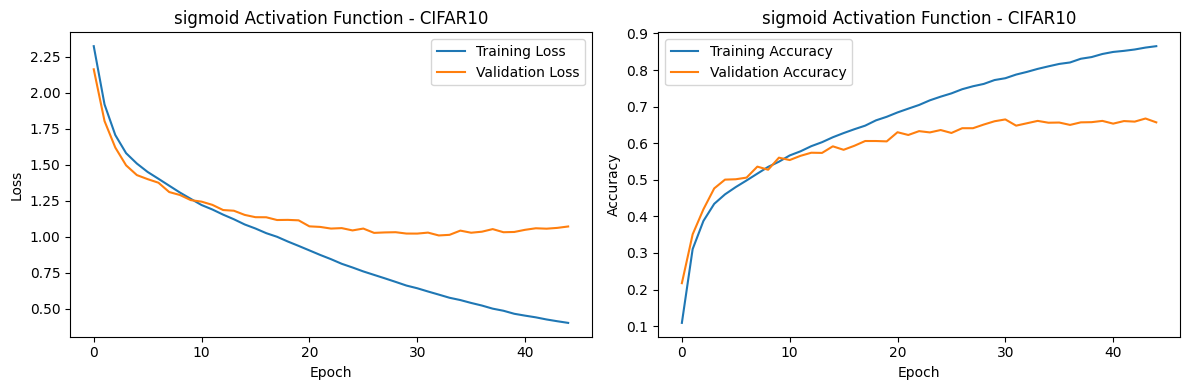

Epoch 1/45
375/375 [==============================] - 6s 14ms/step - loss: 1.4908 - accuracy: 0.4812 - val_loss: 1.2180 - val_accuracy: 0.5775
Epoch 2/45
375/375 [==============================] - 5s 12ms/step - loss: 1.1428 - accuracy: 0.6023 - val_loss: 1.0783 - val_accuracy: 0.6340
Epoch 3/45
375/375 [==============================] - 5s 12ms/step - loss: 1.0383 - accuracy: 0.6398 - val_loss: 1.0202 - val_accuracy: 0.6560
Epoch 4/45
375/375 [==============================] - 5s 13ms/step - loss: 0.9586 - accuracy: 0.6668 - val_loss: 0.9533 - val_accuracy: 0.6730
Epoch 5/45
375/375 [==============================] - 5s 12ms/step - loss: 0.8824 - accuracy: 0.6901 - val_loss: 0.9028 - val_accuracy: 0.6890
Epoch 6/45
375/375 [==============================] - 5s 13ms/step - loss: 0.8160 - accuracy: 0.7170 - val_loss: 0.8575 - val_accuracy: 0.7105
Epoch 7/45
375/375 [==============================] - 5s 13ms/step - loss: 0.7448 - accuracy: 0.7423 - val_loss: 0.8507 - val_accuracy: 0.7170

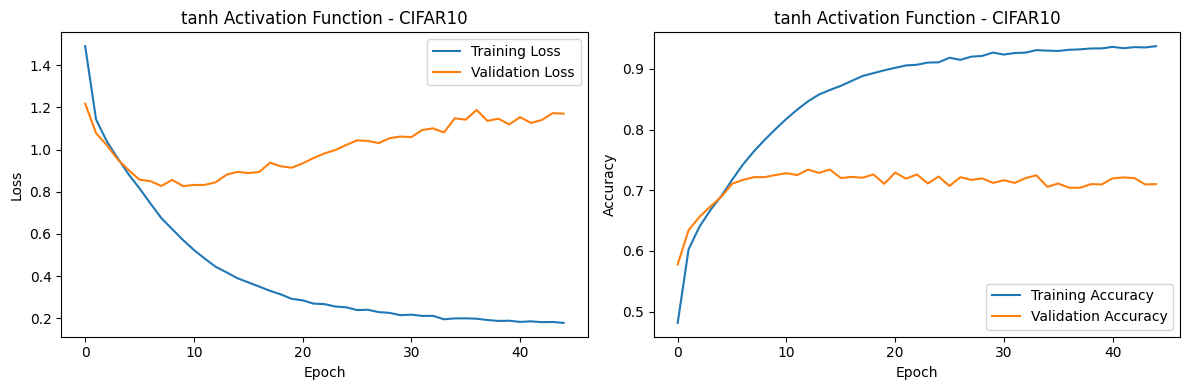

Epoch 1/45
375/375 [==============================] - 6s 13ms/step - loss: 1.4186 - accuracy: 0.4940 - val_loss: 1.1199 - val_accuracy: 0.6330
Epoch 2/45
375/375 [==============================] - 4s 11ms/step - loss: 1.0696 - accuracy: 0.6250 - val_loss: 0.9592 - val_accuracy: 0.6820
Epoch 3/45
375/375 [==============================] - 4s 12ms/step - loss: 0.9491 - accuracy: 0.6671 - val_loss: 0.9087 - val_accuracy: 0.6890
Epoch 4/45
375/375 [==============================] - 5s 12ms/step - loss: 0.8710 - accuracy: 0.6939 - val_loss: 0.8190 - val_accuracy: 0.7330
Epoch 5/45
375/375 [==============================] - 4s 11ms/step - loss: 0.7956 - accuracy: 0.7211 - val_loss: 0.7919 - val_accuracy: 0.7440
Epoch 6/45
375/375 [==============================] - 4s 12ms/step - loss: 0.7259 - accuracy: 0.7445 - val_loss: 0.7521 - val_accuracy: 0.7485
Epoch 7/45
375/375 [==============================] - 5s 12ms/step - loss: 0.6590 - accuracy: 0.7696 - val_loss: 0.7404 - val_accuracy: 0.7470

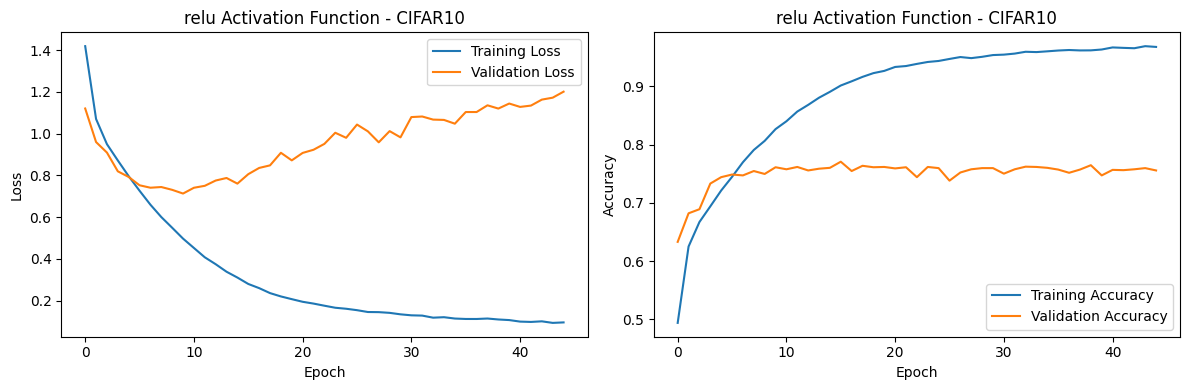

Epoch 1/45
375/375 [==============================] - 6s 13ms/step - loss: 1.4439 - accuracy: 0.4912 - val_loss: 1.1888 - val_accuracy: 0.5960
Epoch 2/45
375/375 [==============================] - 5s 13ms/step - loss: 1.1221 - accuracy: 0.6074 - val_loss: 1.0263 - val_accuracy: 0.6595
Epoch 3/45
375/375 [==============================] - 5s 13ms/step - loss: 1.0111 - accuracy: 0.6472 - val_loss: 0.9503 - val_accuracy: 0.6890
Epoch 4/45
375/375 [==============================] - 5s 13ms/step - loss: 0.9232 - accuracy: 0.6767 - val_loss: 0.9004 - val_accuracy: 0.6930
Epoch 5/45
375/375 [==============================] - 5s 13ms/step - loss: 0.8474 - accuracy: 0.7044 - val_loss: 0.8395 - val_accuracy: 0.7105
Epoch 6/45
375/375 [==============================] - 5s 13ms/step - loss: 0.7685 - accuracy: 0.7317 - val_loss: 0.8124 - val_accuracy: 0.7200
Epoch 7/45
375/375 [==============================] - 5s 13ms/step - loss: 0.6966 - accuracy: 0.7562 - val_loss: 0.7567 - val_accuracy: 0.7470

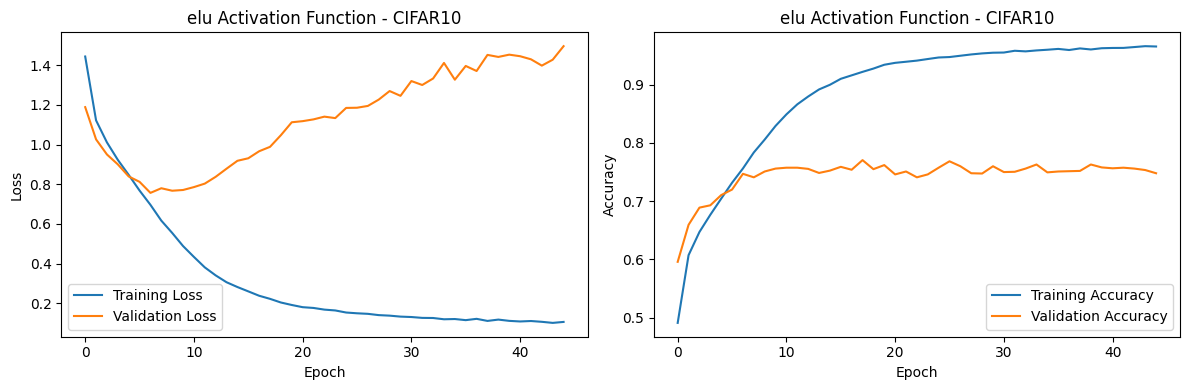

Epoch 1/45
375/375 [==============================] - 7s 15ms/step - loss: 1.5379 - accuracy: 0.4788 - val_loss: 1.1849 - val_accuracy: 0.5940
Epoch 2/45
375/375 [==============================] - 5s 13ms/step - loss: 1.1611 - accuracy: 0.5960 - val_loss: 1.0667 - val_accuracy: 0.6290
Epoch 3/45
375/375 [==============================] - 5s 13ms/step - loss: 1.0805 - accuracy: 0.6266 - val_loss: 1.0369 - val_accuracy: 0.6555
Epoch 4/45
375/375 [==============================] - 5s 13ms/step - loss: 1.0226 - accuracy: 0.6459 - val_loss: 0.9870 - val_accuracy: 0.6735
Epoch 5/45
375/375 [==============================] - 5s 13ms/step - loss: 0.9762 - accuracy: 0.6618 - val_loss: 0.9981 - val_accuracy: 0.6590
Epoch 6/45
375/375 [==============================] - 5s 13ms/step - loss: 0.9311 - accuracy: 0.6743 - val_loss: 0.9344 - val_accuracy: 0.6830
Epoch 7/45
375/375 [==============================] - 5s 13ms/step - loss: 0.8755 - accuracy: 0.6952 - val_loss: 0.8774 - val_accuracy: 0.7110

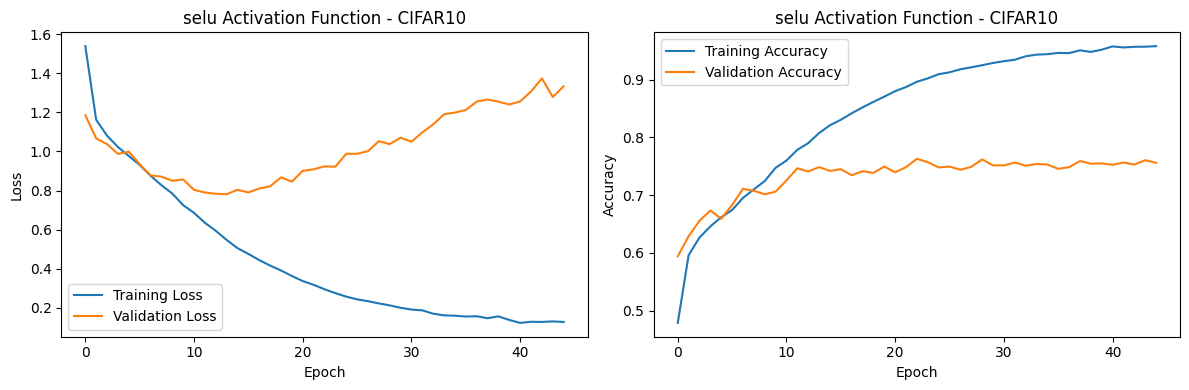

In [ ]:
for node in nodes:
  model=NeuralNetwork(node,input_shape=(32,32,3))
  history=model.fit(train_images,train_labels,batch_size=128,validation_data=(x_validation,y_validation),epochs=45)
  plot_results(history,node,"CIFAR10")

COMMENTS: By looking at the different curves, we notice at some point there is overfitting. for my analyse I look at the difference between trainning and validation accuracies, smaller it is, better is our activation function. this leads me to take **Sigmoid** as the best activation node for the CIFAR10 dataset based on my experiment.